## 机器学习
#### 上节课，非监督学习（kmeans）
#### 本节课，介绍监督学习的相关概念
#### 奥卡姆剃刀原理：The explanation requiring the fewest assumptions is most likely to be correct.
+ 假设：感冒药大卖（新冠-害怕-吃药-大卖），条件太多，后期反而卖的少，假设是错误的
+ 能用简单方法就尽量用简单方法，事物一旦复杂，往往容易出错

#### 监督式学习
+ 如果y最终输出的是一个实数，此类问题为回归问题，用于Predict
+ 如果y最终输出的是一个向量，且向量内各数据求和为1，向量内每个数据为不同类别的概率，此类问题为分类问题，用于Classification

#### 作业 1,3,4
1. 实现softmax，cross-entropy，并且说明他们的使用场景和作用意义；
> 在多分类问题中，softmax用来做归一化，Corss-Entropy用来度量softmax的分类效果，Corss-Entropy就是loss函数。对Corss-Entropy求偏导得到梯度下降函数，进而得到loss最小的模型

3. 总结AUC的作用和意义

> AUC是一个模型评价指标，只能用于二分类模型的评价，对于二分类模型，还有很多其他评价指标，比如logloss，accuracy，precision.

> AUC是area under curve的缩写，就是ROC曲线下面的面积。ROC曲线基于样本的真实类别和预测概率来画的，ROC的x轴是伪阳性率，y是真阳性率。

> 为什么要用auc衡量模型的好坏呢？

> 这主要归功于AUC的优势，AUC的计算方法同时考虑了分类器对于正例和负例的分类能力，在样本不平衡的情况下，依然能够对分类器作出合理的评价。

> 例如在反欺诈场景，设欺诈类样本为正例，正例占比很少（假设0.1%），如果使用准确率评估，把所有的样本预测为负例，便可以获得99.9%的准确率。

> 但是如果使用AUC，把所有样本预测为负例，TPRate和FPRate同时为0（没有Positive），与(0,0) (1,1)连接，得出AUC仅为0.5，成功规避了样本不均匀带来的问题。

4. 城市里边有一共200万个居民，其中有100人是犯罪分子，然后警察随机找了一批人，这批人一共200人： 现在定义犯罪分析为positive samples, 那么case1: 警察定义的这200人中，一共有犯罪分子实际有89人，警察判定是犯罪分子的人一共有80人，这80人中，真正是犯罪分子的有79名；请问，警察判断的accuracy是多少，recall是多少，precision是多少？ case2: 警察定义的这200人中，一共有犯罪分子实际有100人，警察判定是犯罪分子的人一共有200人，这200人中，真正是犯罪分子的有100名；请问，警察判断的accuracy是多少，recall是多少，precision是多少？

> case1:accuracy = 189/200, precision = 79/80, recall = 79/89

> case2:accuracy = 100/200, precision = 100/200, recall = 1

## 1.线性回归 Linear regression

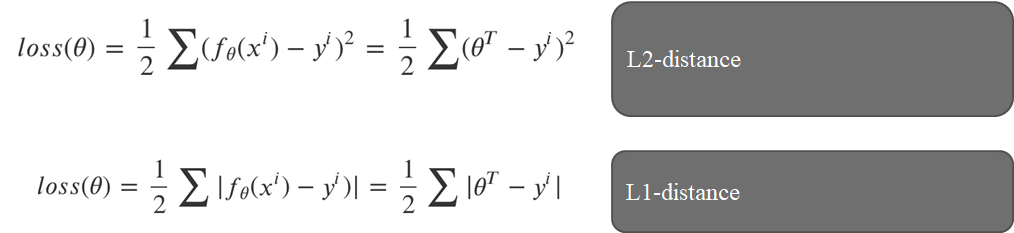

#### $loss(\theta)$越小，代表拟合的效果越好，$loss(\theta)$越大，代表拟合的效果越差

+ 假设 $\overrightarrow{x} = (x_1,x_2,x_3),\theta = (w_1,w_2,w_3)$,求$w_1,w_2,w_3,b$ 使得$loss$最小，用梯度下降求解$loss$最小值，利用$\frac{\partial{loss}}{\partial{w_1}},\frac{\partial{loss}}{\partial{w_2}},\frac{\partial{loss}}{\partial{w_3}},\frac{\partial{loss}}{\partial{b}}$求解

#### L1-distance和L2-distance的差别

+ 假设 $x = [1,2,5],y = [3,5,6]$ ,预测值 $y_1 = [2,4,6],y_2 = [3,7,6]$ ,针对预测值 $y_1,y_2,L1(y_1) = L1(y_2),L2(y_1) < L2(y_2)$
+ 上例说明，L2会放大更大的误差，如果期望预测值更稳定，可用L2，如果期望求总体误差最小，利用奥卡姆剃刀原理，用L1即可

## 2.逻辑回归 Logistic regression

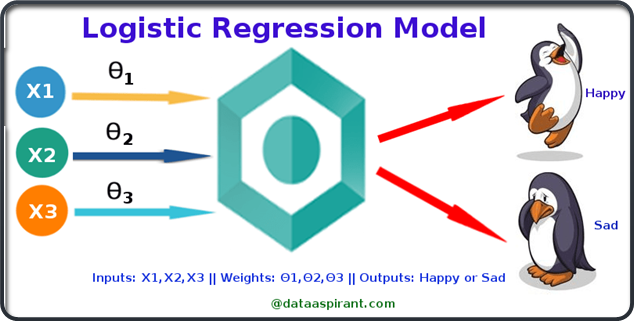

+ Inputs: $x_1,x_2,x_3$
+ Weights: $\theta_1,\theta_2,\theta_3$
+ Outputs: 0-1之间的数字，如0-0.5表示Sad,0.5-1表示Happy
+ Logistic regression:Logistic指一类曲线 $y' = y(1-y)*t $, $ t=1 $ 时，sigmod 函数$ y = \frac{1}{1+e^{-x}},x \in (-\infty, +\infty), y \in (0, 1) $符合上式. regression回归，因为输出的是0-1间的实数

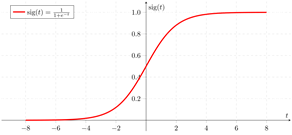

$\overrightarrow{x} = (x_1,x_2,x_3), \overrightarrow{w} = (w_1,w_2,w_3), f(x) = \overrightarrow{x}\overrightarrow{w}^{T}+b = x_1w_1+x_2w_2+x_3w_3+b $,把f(x)代入 $-\frac{1}{1+e^{-x}}$ 得到 $-\frac{1}{1+e^{-f(x)}}$, 可以通过优化$w_1,w_2,w_3,b$, 使得当x表示开心时，越倾向于输出1

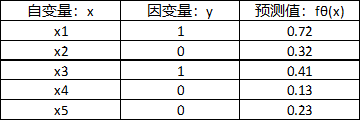

结合上面数据，可以看出
+ if $ y_{ture}=1,f_\theta(x) \rightarrow 1,loss \rightarrow  0$,规律符合下图手画红线，即 $loss = -logf_\theta(x)$
+ if $ y_{ture}=0,f_\theta(x) \rightarrow 0,loss \rightarrow  0$,即 $loss = -log(1-f_\theta(x))$
> 为什么loss函数要用log，而不是直接写成，if $ y_{ture}=1, loss = 1-f_\theta(x)$, if $ y_{ture}=0, loss = f_\theta(x)$, 原因$loss = -logf_\theta(x)$ 梯度更大，更新更快，效率更高

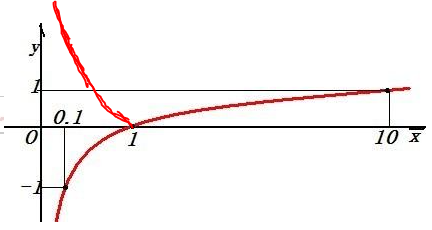

#### Cross-Entropy方程如下
+ equation 方程，等式，存在可质疑空间
+ formula 公式，公认的，一定是对的

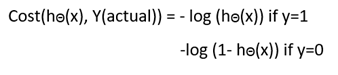

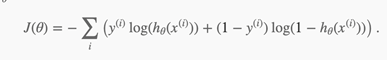

#### 为什么要叫Cross-Entropy交叉熵，来源于信息论Information一书中,熵: $-\sum{P_rlogP_r}$
举例：A={a,a,a,a}, B={a,b,c}, C={a,a,b,c},即set(A)={a},set(B)={a,b,c},set(C)={a,b,c},A的熵为 $-\sum{1log1}$, B的熵为 $-(\frac{1}{3}log{\frac{1}{3}}+\frac{1}{3}log{\frac{1}{3}}+\frac{1}{3}log{\frac{1}{3}})$, C的熵为 $-(\frac{1}{2}log{\frac{1}{2}}+\frac{1}{4}log{\frac{1}{4}}+\frac{1}{4}log{\frac{1}{4}})$，经计算，B的熵最大，即B包含的信息量最大，B的信息混乱程度最大

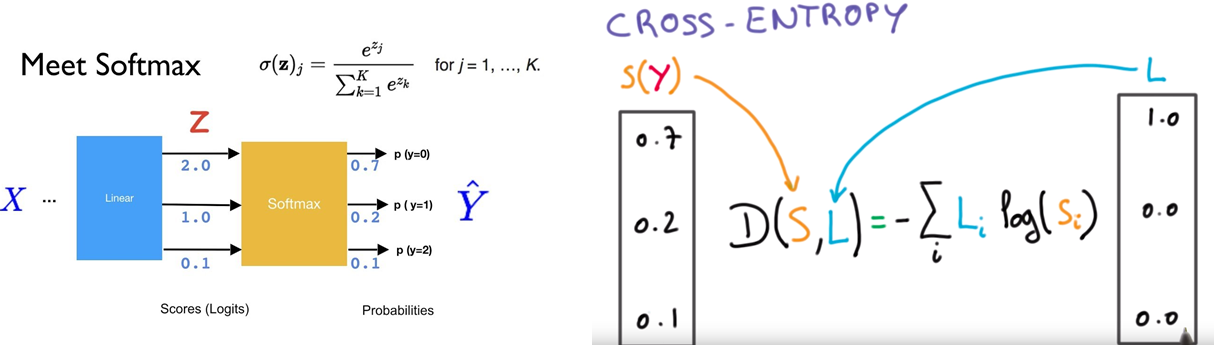

## 3.Softmax,Cross-Entropy

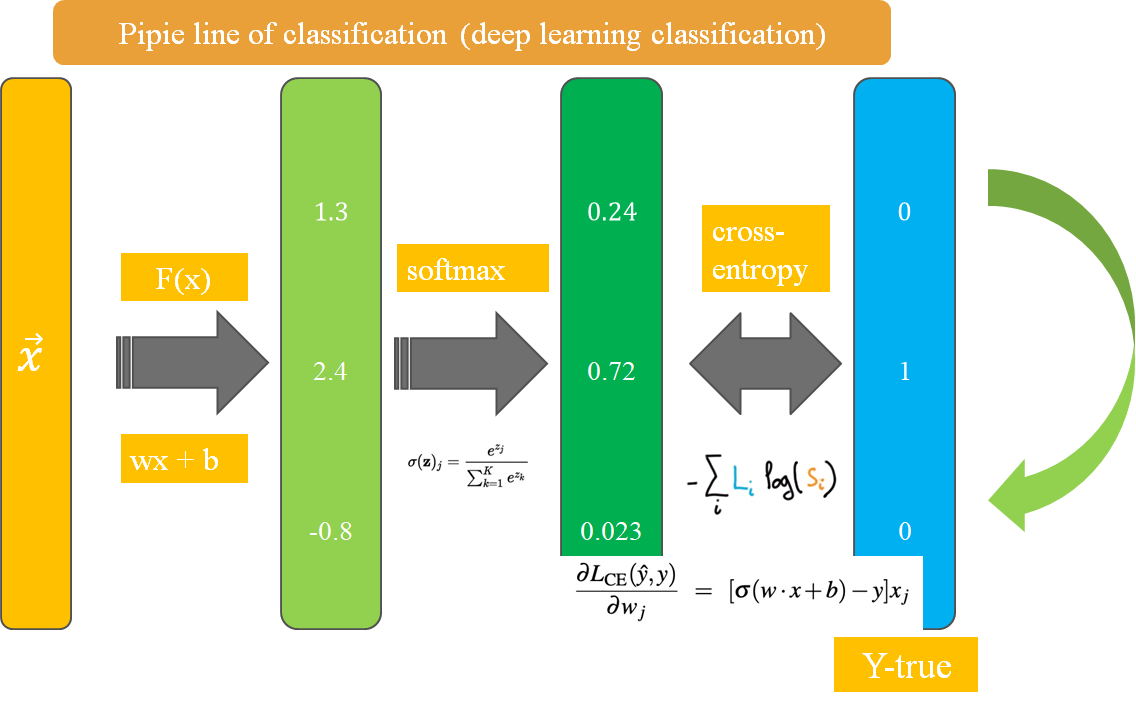

### Softmax

$$ softmax(\vec{x}) = \frac{e^{x_i}}{\sum{e^{x_j}}}$$

假设我们现在有一个向量，来描述某位同事的最近情况，预测他的心情

#### Sigmod可以看做是softmax的特殊形式

$$ sigmod = \frac{1}{1 + e^{-x}} = \frac{e^0}{e^0 + e^{-x}}$$

In [11]:
person1 = [85,34,34,54]

In [12]:
心情 = ['开心','难过','平静','惊喜','迷离']

In [13]:
import numpy as np

In [14]:
# numpy.random.rand(d0,d1,…,dn) rand函数根据给定维度生成[0,1)之间的数据，包含0，不包含1 dn表格每个维度 返回值为指定维度的array
# numpy.random.randn(d0,d1,…,dn) randn函数返回一个或一组样本，具有标准正态分布。 dn表格每个维度 返回值为指定维度的array
weights = np.random.randn(4,5)
weights

array([[-0.77304871, -0.64256797,  0.23952199,  1.7347045 ,  0.27322529],
       [-0.717425  , -0.15059711,  1.30071288, -1.5587018 , -0.59203369],
       [-0.10169606,  1.3125126 ,  0.93725005, -0.65972885, -1.14694162],
       [ 0.65411066, -0.88808199,  0.24024438,  0.3008232 ,  1.57312571]])

In [15]:
# wx+b
# np.random.random() 生成随机浮点数
bias = np.random.random()
bias

0.5593647645822807

In [16]:
logits = np.dot(person1,weights) + bias
logits

array([-57.67791637, -62.51021401, 109.98267031,  88.82705766,
        49.6071422 ])

In [17]:
def softmax(x):
    x -= np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [18]:
# 因为输入值变化较大，x需要做一个特殊处理，才能避免下面的情况
# 经过softmax变化，输出一个概率分布，输出的值和为1，每个值都在0-1之间
softmax(logits)

array([1.53437803e-73, 1.22262190e-75, 9.99999999e-01, 6.48984263e-10,
       6.01507850e-27])

### Corss-Entropy

$$ cross-entropy(label,pro) = -\sum_{i\in N} label_i*log(pro(i))$$

In [31]:
person1 = [85,34,34,54]
y_about_person1 = [0,1,0,0,0] # 表示心情是难过
predicated = softmax(logits) # softmax权重
another_predicated = [0.01,0.8,0.1,0.05,0.04] #另外一组权重

#### 每个person，都有对应的标记y_about_person，通过梯度下降来改变weights和bias，通过改变weights和bias，进而改变softmax最终输出的概率分布
#### 需要衡量weights和bias，即衡量y_about_person和softmax最终输出的概率分布的好坏，loss的多少
#### 用来Corss-Entropy实现
#### Corss-Entropy是用来度量softmax的分类效果的，softmax是用来做归一化的，Corss-Entropy是loss函数

In [28]:
def corss_entropy(label,predicated):
    return -sum(label[i]*np.log(predicated[i]) for i in range(len(label)))

In [29]:
corss_entropy(y_about_person1,predicated)

172.49288432586212

In [32]:
corss_entropy(y_about_person1,another_predicated)

0.2231435513142097

#### another_predicated 得到的loss比较小，利用Gradient Descent得到最小的loss

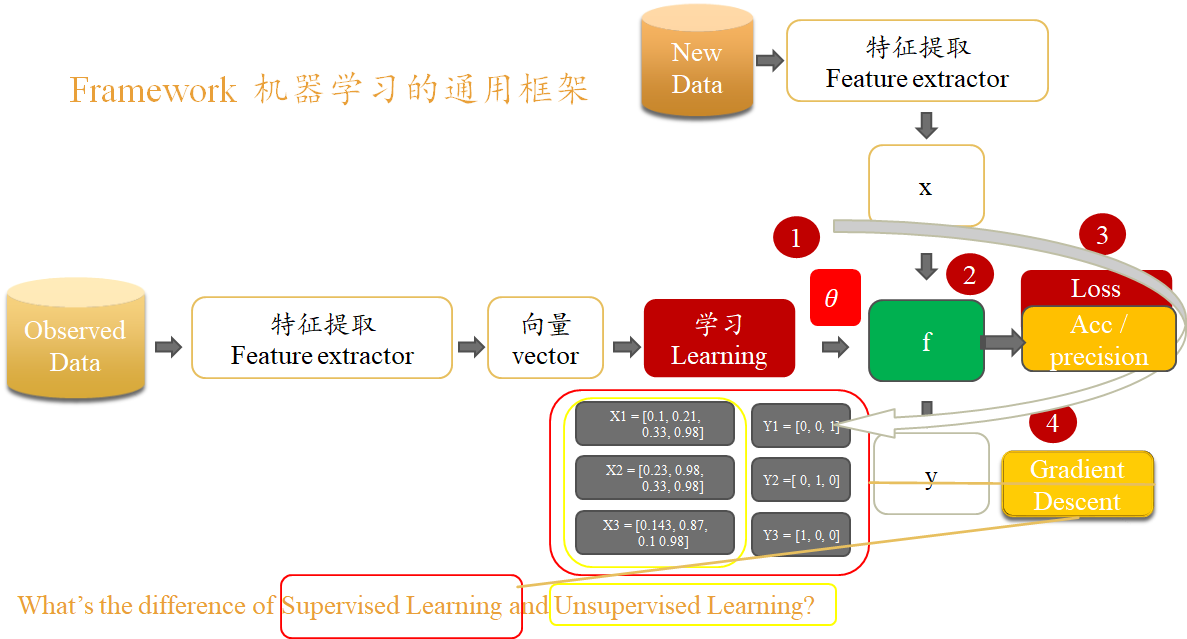

loss函数作用：
+ 衡量学习效果，即learning的效果
+ 可通过求偏导$\frac{\partial{loss}}{\partial{\theta}}$，更新参数

loss函数为过程指标，还需要结果指标，来判断f分类的对错好坏

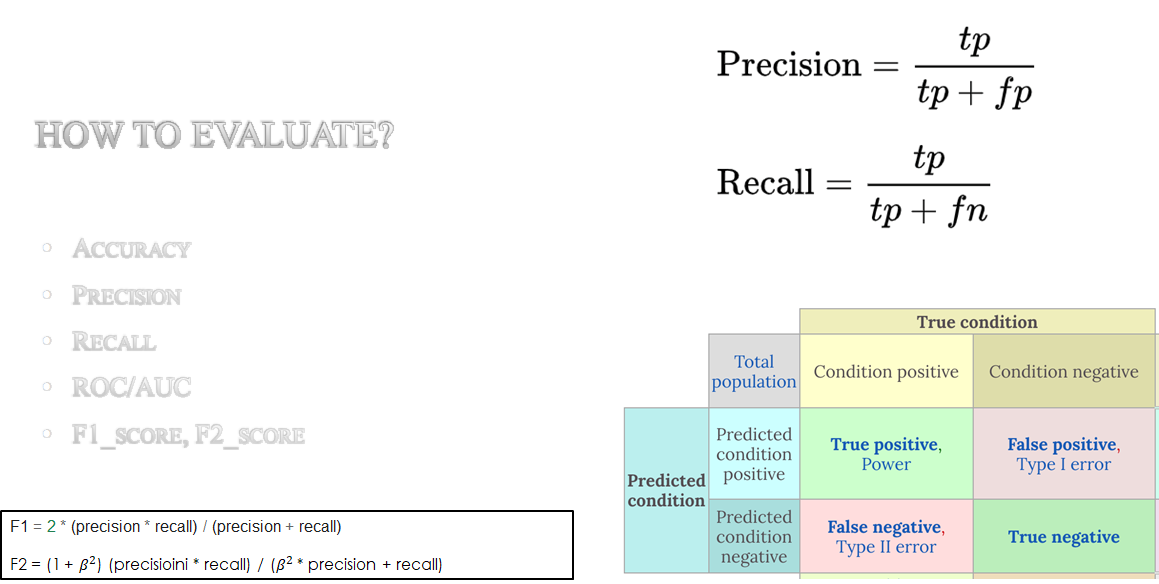

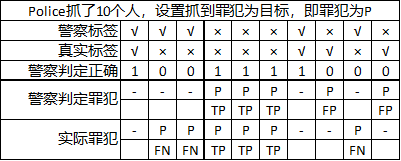

结合上图数据：
+ Accuracy 预测对了的比例 5/10
+ Precision 警察判定罪犯中，警察的命中率 3/(3+2)
+ Recall 实际罪犯中，警察的命中率 3/(3+3)
+ 如果一个警察判定所有人都为坏人，Recall=1，Precision=6/10，Accuracy=6/10

术语：PR双95，Precision>95%,Recall>95%

一个城市有1%的坏人，警察在街上随机抓了100个人，其中1个人是坏人，警察判定都是好人，则Accuracy=99%, Precision=0, Recall=0。相同情况，垃圾邮件做以上操作，判定正确率为98%，抽检做以上操作，判定正确率为97%。

上述99%，98%，97%可以设置为baselie,你做的模型，起码要比baseline好，才说明模型时有效果的

数据不均衡时，用Precision, Recall等判断，可能不准确，此时可用AUC评价模型，AUC(Area under curve)越接近于1，说明模型预测效果越好，越接近于0，则效果越差。AUC为ROC曲线下方的面积。

## 4.正则化 Regularization

## 5.交叉验证 Cross-Validation